# Bi-LSTM (GloVe Embeddings)

### Libraries

In [1]:
import process_funcs as pf

import os
import pandas as pd
import numpy as np
import gensim

### Parameters

In [2]:
max_len = 500 # maximum length of input vectors
max_words = 15000 # top n words in vocab 

### Reading Data

In [3]:
train_x, test_x, train_y, test_y, label_map  = pf.get_train_test()

In [4]:
#Sample instance
train_x[0][0:200]

['mps',
 'tout',
 'lords',
 'replacement',
 'plan',
 'group',
 'mps',
 'tried',
 'raise',
 'pressure',
 'tony',
 'blair',
 'reform',
 'house',
 'lords',
 'publishing',
 'detailed',
 'blueprint',
 'change',
 'cross',
 'party',
 'group',
 'unveiled',
 'draft',
 'bill',
 'proposing',
 'smaller',
 'second',
 'chamber',
 '70',
 'members',
 'would',
 'elected',
 'mps',
 'peers',
 'failed',
 'agree',
 'reform',
 'since',
 '1999',
 '600',
 'hereditaries',
 'lost',
 'seats',
 'group',
 'says',
 'win',
 'support',
 'removing',
 'last',
 '92',
 'hereditaries',
 'government',
 'postponed',
 'plans',
 'remove',
 'remaining',
 'hereditary',
 'peers',
 'said',
 'unlikely',
 'succeed',
 'opposition',
 'lords',
 'tony',
 'blair',
 'argued',
 'needs',
 'consensus',
 'reforms',
 'suggestions',
 'proposals',
 'changing',
 'least',
 'powers',
 'lords',
 'labour',
 'manifesto',
 'party',
 'group',
 'including',
 'tories',
 'ken',
 'clarke',
 'sir',
 'george',
 'young',
 'labour',
 'robin',
 'cook',
 'tony',

### Data Processing

In [5]:
train_x, tokenizer = pf.lstm_build_sequences(train_x, max_words, max_len)
test_x, tokenizer = pf.lstm_build_sequences(test_x, max_words, max_len, tokenizer=tokenizer)
word_index = tokenizer.word_index

list(word_index.items())[:5]

[('said', 1), ('mr', 2), ('would', 3), ('year', 4), ('also', 5)]

### Embeddings: Word2Vec

In [6]:
embeddings_index = pf.get_word2vec_embeddings()
embeddings_index['test']

array([-1.42578125e-01, -3.68652344e-02,  1.35742188e-01, -6.20117188e-02,
        7.95898438e-02,  1.90429688e-02, -8.15429688e-02, -1.27929688e-01,
       -2.95410156e-02,  2.36328125e-01, -1.21582031e-01, -2.14843750e-01,
        1.29882812e-01, -2.70996094e-02, -5.20019531e-02,  2.15820312e-01,
       -1.81640625e-01,  5.10253906e-02, -1.60156250e-01, -1.76757812e-01,
        1.83105469e-02, -4.12597656e-02, -2.32421875e-01, -1.03149414e-02,
        1.45507812e-01,  5.24902344e-02, -3.96484375e-01, -1.92871094e-02,
        2.51770020e-03, -1.26953125e-02, -4.39453125e-02,  3.07617188e-02,
        9.57031250e-02, -1.75781250e-01,  1.04370117e-02,  1.89453125e-01,
       -2.36328125e-01,  4.37011719e-02,  2.81250000e-01, -2.07519531e-02,
       -1.81640625e-01, -2.17773438e-01,  2.33398438e-01,  5.29785156e-02,
       -1.13769531e-01,  9.39941406e-03, -1.49414062e-01,  1.99218750e-01,
       -1.75781250e-01,  3.16406250e-01,  8.10546875e-02, -6.12792969e-02,
       -1.52343750e-01, -

In [7]:
embedding_dim, embedding_mat = pf.lstm_build_embed_mat(embeddings_index, word_index, max_words)

### Modeling

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Flatten

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(embedding_dim)))
model.add(Dense(5, activation='sigmoid'))
model.summary()

model.layers[0].set_weights([embedding_mat])
model.layers[0].trainable = False

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          4500000   
_________________________________________________________________
bidirectional (Bidirectional (None, 600)               1442400   
_________________________________________________________________
dense (Dense)                (None, 5)                 3005      
Total params: 5,945,405
Trainable params: 5,945,405
Non-trainable params: 0
_________________________________________________________________


Train on 1072 samples, validate on 120 samples
Epoch 1/50
1072/1072 [==============================] - 7s 6ms/sample - loss: 1.7572 - acc: 0.2752 - val_loss: 1.5793 - val_acc: 0.2917
Epoch 2/50
1072/1072 [==============================] - 3s 3ms/sample - loss: 1.5951 - acc: 0.3470 - val_loss: 1.5229 - val_acc: 0.2333
Epoch 3/50
1072/1072 [==============================] - 3s 3ms/sample - loss: 1.3696 - acc: 0.5317 - val_loss: 0.9393 - val_acc: 0.6500
Epoch 4/50
1072/1072 [==============================] - 3s 3ms/sample - loss: 1.0637 - acc: 0.6222 - val_loss: 0.9043 - val_acc: 0.6500
Epoch 5/50
1072/1072 [==============================] - 3s 3ms/sample - loss: 0.8018 - acc: 0.7631 - val_loss: 1.7428 - val_acc: 0.4333
Epoch 6/50
1072/1072 [==============================] - 3s 3ms/sample - loss: 1.0427 - acc: 0.6679 - val_loss: 0.8504 - val_acc: 0.6667
Epoch 7/50
1072/1072 [==============================] - 3s 3ms/sample - loss: 0.5940 - acc: 0.8097 - val_loss: 0.7917 - val_acc: 0.7167
E

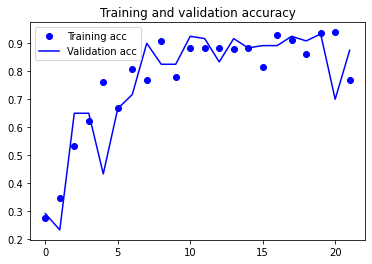

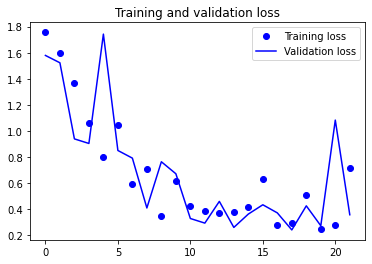

In [9]:
#Training
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import Callback, EarlyStopping

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
earlystopping = EarlyStopping(monitor = "val_loss", 
                                mode = "min", patience = 5, 
                                restore_best_weights = True)
history = model.fit(train_x, train_y.values,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.1, 
                    callbacks=[earlystopping])
accuracy, f1_score = pf.lstm_plot(model, history, test_x, test_y)

In [10]:
pf.store_results('bilstm', 'word2vec', model, accuracy, f1_score, tf_model=1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/bilstm-word2vec\assets
